<a href="https://colab.research.google.com/github/arlankazast/Arlan/blob/master/AgglomerativeClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agglomerative clustering using further neighborhood method : Task 2**


In [0]:
import numpy as np

X = np.array([[3,4,0.12],
    [1,4.5,0.15],
    [1.2,5,0.89],
    [1.4,3.5,0.66],
    [1.5,3.2,0.56],
    [1.6,3.6,0.23],
    [1.8,3.4,0.78],
    [1.2,3.7,0.84],
    [0.8,2.6,0.15],])

The data point on scatter plot to see where they are (9 companies)

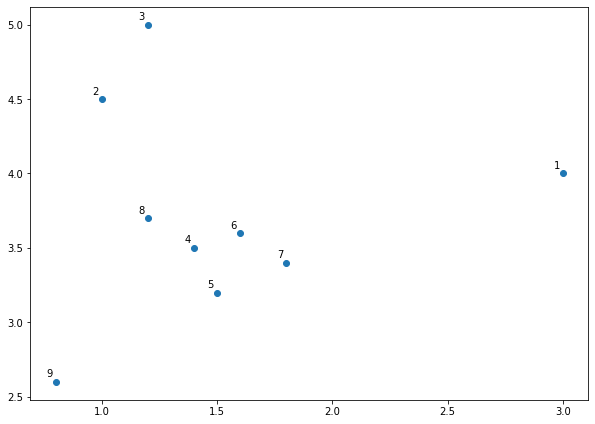

In [7]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

Constructing dendrogram to see how many clusters we need (complete method in python is similar to far neighborhood method )

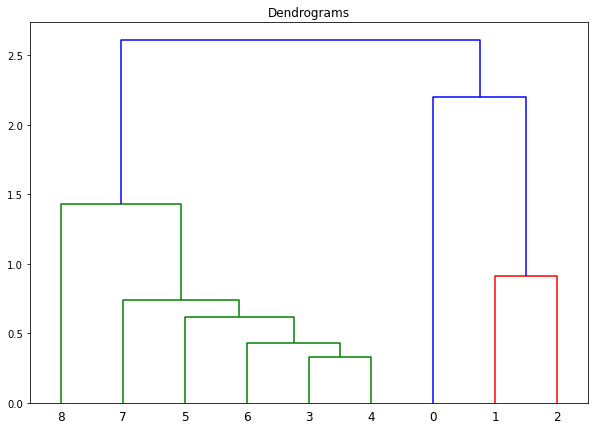

In [9]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method = 'complete'))

Predicting to which of 2 clusters the data points should belong using euclidean distance and further neighborhood method

In [10]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
cluster.fit_predict(X)

array([0, 0, 0, 1, 1, 1, 1, 1, 1])

Visualising the 2 clusters in scatter plot

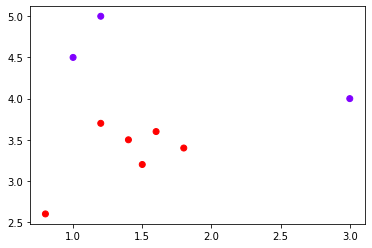

In [17]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

#** Task 3**: From euclidean distance matrix predicting to which cluster will belong the data points with near neighborhood method (single in python)
#distance matrix taken from excel

In [21]:
dist_matrix = np.array([[0,49.01,36.249,28.16,57.801,64.288,81.32],
               [49.01,0,21.26,58.592,34.132,68.884,105.418],
               [36.249,21.26,0,38.275,23.854,49.649,84.291],
               [28.16,58.592,38.275,0,40.497,39.446,53.852],
               [57.801,34.132,23.854,40.497,0,39.623,81.302],
               [64.288,68.884,49.649,39.446,39.623,0,43.081],
               [81.32,105.418,84.291,53.852,81.302,43.081,0]])
model = AgglomerativeClustering(affinity='precomputed', n_clusters=2, linkage='single').fit(dist_matrix)
print(model.labels_)

[0 0 0 0 0 0 1]


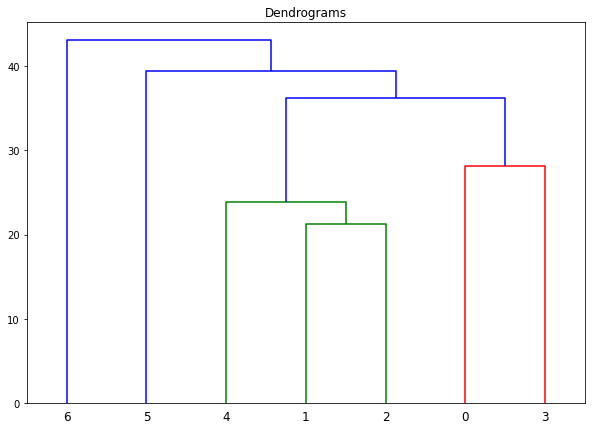

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
dists = squareform(dist_matrix)
linkage_matrix = linkage(dists, "single")
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(linkage_matrix)


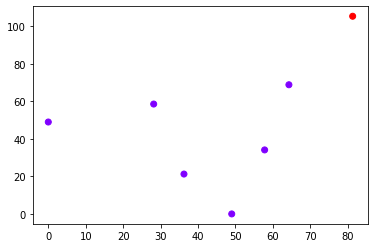

In [25]:
plt.scatter(dist_matrix[:,0],dist_matrix[:,1], c=model.labels_, cmap='rainbow')